In [1]:
# Dependencies and Setup
from scipy.stats import linregress
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
import numpy as np
import requests
%matplotlib inline
plt.style.use('ggplot')

personal_data=requests.get('https://api.bjs.ojp.gov/bjs/ncvs/v2/personal/2018?format=json').json()
household_data=requests.get('https://api.bjs.ojp.gov/bjs/ncvs/v2/household/2018?format=json').json()


In [2]:
url = "https://api.bjs.ojp.gov/bjs/ncvs/v2/personal/"

year_list = ["2014", "2015", "2016", "2017", "2018"]

# Set empty lists to hold personal data
weight = []
ager = []
gender = []
hincome = []
newcrime = []
locationr = []
years = []
region=[]
notify=[]

# Loop through each year
for year in year_list:

    # Create search query, make a request and store in JSON file
    query = url + year + "?format=json" 
    response = requests.get(query)
    response_json = response.json()
    
    data_list = response_json["personalData"]
  
    for data in data_list:
        
        try: 
            region.append(data['region'])
            years.append(data['year'])
            weight.append(data['weight'])
            ager.append(data['ager'])
            notify.append(data['notify'])
            gender.append(data['gender'])
            hincome.append(data['hincome'])
            newcrime.append(data['newoff'])
            locationr.append(data['locationr'])
        except Exception:
            print(data)

In [3]:
#Create a dataframe
ncvs = pd.DataFrame({
    "region":region,
    "file report":notify,
    "year": years,
    "weight": weight,
    "ager": ager,
    "gender": gender,
    "hincome": hincome,
    "newcrime":newcrime,
    "locationr": locationr})

ncvs.head()


,region,file report,year,weight,ager,gender,hincome,newcrime,locationr
0,3,1,2014,2877.2646,5,2,4,1,2
1,3,2,2014,4079.9336,4,1,88,3,3
2,3,1,2014,5984.119,4,2,88,3,2
3,3,2,2014,3271.8376,6,1,4,3,5
4,3,1,2014,3402.2559,6,1,88,4,1


In [4]:
#Replacing column numerical values into readdable data as pe rhte values assigned in the Personal Crime  API

ncvs['ager'] = ncvs['ager'].replace({"1":"12-14",
        "2":"15-17",
        "3": "18-20",
        "4": "21-24",                         
        "5": "25-34",
        "6": "35-49",
        "7": "50-64",                         
        "8": "65+"})

ncvs['gender'] = ncvs['gender'].replace({"1":"Male",
        "2":"Female"})


ncvs['region'] = ncvs['region'].replace({"1":"NorthEast",
        "2": "MidWest",
        "3": "South",
        "4": "West"})

ncvs['file report'] = ncvs['file report'].replace({"1":"Yes",
        "2": "No",
        "3": "Do not know"})



ncvs['hincome'] = ncvs['hincome'].replace({"1":"<7.5k",
        "2": "7.5k-14.9k",
        "3": "15k-24.9k",
        "4": "25k-34.9k",
        "5": "35k-49.9k",
        "6": "50k-74.9k",
        "7": "75k+",
        "88": "Unknown"})

ncvs['locationr'] = ncvs['locationr'].replace({"1":"victim's home",
        "2": " friend/neighbor/relative's home",
        "3": "com/parking lot or public",
        "4": "school",
        "5": "other location"})

ncvs['newcrime'] = ncvs['newcrime'].replace({"1":"Rape/sexual assault",
        "2": "Robbery",
        "3": "Aggravated assault",
        "4": "Simple assault",
        "5": "Personal theft"})

ncvs = ncvs.rename(columns = {'ager': 'age', 'hincome': 'income', 
                     'newcrime': 'crime type', 'locationr': 'location'})

ncvs.head()


,region,file report,year,weight,age,gender,income,crime type,location
0,South,Yes,2014,2877.2646,25-34,Female,25k-34.9k,Rape/sexual assault,friend/neighbor/relative's home
1,South,No,2014,4079.9336,21-24,Male,Unknown,Aggravated assault,com/parking lot or public
2,South,Yes,2014,5984.119,21-24,Female,Unknown,Aggravated assault,friend/neighbor/relative's home
3,South,No,2014,3271.8376,35-49,Male,25k-34.9k,Aggravated assault,other location
4,South,Yes,2014,3402.2559,35-49,Male,Unknown,Simple assault,victim's home


In [5]:
#Set url for Household Crimes  API
url = "https://api.bjs.ojp.gov/bjs/ncvs/v2/household/"

# Set empty lists to hold data
weight_h =[]
ager_h = []
gender_h = []
hincome_h = []
newcrime_h = []
locationr_h = []
years_h = []
region_h=[]
notify_h=[]


# Loop through each year
for year in year_list:

    # Create search query, make a request and store in JSON file
    query = url + year + "?format=json"
    response = requests.get(query)
    response_json = response.json()
    
    data_list=response_json["householdData"]
  
    for data in data_list:
        
        try: 
            region_h.append(data['region'])
            years_h.append(data['year'])
            weight_h.append(data['weight'])
            ager_h.append(data['hhage'])
            notify_h.append(data['notify'])
            gender_h.append(data['hhgen'])
            hincome_h.append(data['hincome'])
            newcrime_h.append(data['newoff'])
            locationr_h.append(data['locationr'])
        except Exception:
           print(data)

In [6]:
#Creating Dataframesfor household data
ncvs_h = pd.DataFrame({
    "region_h":region_h,
    "notify_h":notify_h,
    "year_h": years_h,
    "weight_h": weight_h,
    "age_h": ager_h,
    "gender_h": gender_h,
    "hincome_h": hincome_h,
    "newcrime_h": newcrime_h,
    "locationr_h": locationr_h})

ncvs_h.head()


,region_h,notify_h,year_h,weight_h,age_h,gender_h,hincome_h,newcrime_h,locationr_h
0,4,1,2014,2838.076,2,2,4,6,1
1,4,1,2014,3188.369,4,2,7,8,3
2,4,2,2014,3303.2144,3,2,7,8,1
3,4,1,2014,3795.8252,2,1,4,8,1
4,4,2,2014,3044.386,3,1,1,8,1


In [7]:
#Replacing column numerical values into readdable data as pe rhte values assigned in the Household Crime  API

ncvs_h['age_h'] = ncvs_h['age_h'].replace({"1":"<19",
        "2":"20-34",
        "3": "35-49",
        "4": "50-64",
        "5": "65+"})

ncvs_h['gender_h'] = ncvs_h['gender_h'].replace({"1":"Male",
        "2":"Female"})


ncvs_h['region_h'] = ncvs_h['region_h'].replace({"1":"Northeast",
        "2": "Midwest",
        "3": "South",
        "4": "West"})

ncvs_h['notify_h'] = ncvs_h['notify_h'].replace({"1":"Yes",
        "2": "No",
        "3": "Do not know"})


ncvs_h['hincome_h'] = ncvs_h['hincome_h'].replace({"1":"<7.5k",
        "2": "7.5k-14.9k",
        "3": "15k-24.9k",
        "4": "25k-34.9k",
        "5": "35k-49.9k",
        "6": "50k-74.9k",
        "7": "75k+",
        "88": "Unknown"})

ncvs_h['locationr_h'] = ncvs_h['locationr_h'].replace({"1":"victim's home",
        "2": " friend/neighbor/relative's home",
        "3": "com/parking lot or public",
        "4": "school",
        "5": "other location"})

ncvs_h['newcrime_h'] = ncvs_h['newcrime_h'].replace({"8":"Theft",
        "7": "Motor-vehicle theft",
        "6": "Burglary/trespassing"})

ncvs_h = ncvs_h.rename(columns = {'region_h': 'region', 'notify_h': 'file report',
                       'year_h': 'year', 'weight_h': 'weight',
                       'age_h': 'age', 'gender_h': 'gender',
                       'hincome_h': 'income', 'newcrime_h':'crime type',
                       'locationr_h': 'location'})

ncvs_h.head()

,region,file report,year,weight,age,gender,income,crime type,location
0,West,Yes,2014,2838.076,20-34,Female,25k-34.9k,Burglary/trespassing,victim's home
1,West,Yes,2014,3188.369,50-64,Female,75k+,Theft,com/parking lot or public
2,West,No,2014,3303.2144,35-49,Female,75k+,Theft,victim's home
3,West,Yes,2014,3795.8252,20-34,Male,25k-34.9k,Theft,victim's home
4,West,No,2014,3044.386,35-49,Male,<7.5k,Theft,victim's home


---
## Analysis by Income
---

###### Personal Crime Victimization by Income Category For All Four Regions, 2014 - 2018

In [8]:
#ncvs['year'].unique()

# Create GroupBy object based on "income":
grouped_pincome_df=ncvs.groupby(['income'])

# Total number of victims in each income group:
total_pvictims_by_grup=grouped_pincome_df['gender'].count()
#total_pvictims_by_grup

# Total number of victims:
total_pvictims=ncvs['income'].count()
#total_pvictims

# Calculate percentage of victims in each income group:
pct_of_pvictims=(total_pvictims_by_grup/total_pvictims)*100
#pct_of_pvictims

# Change index:
pct_of_pvictims=pct_of_pvictims.reset_index()
pct_of_pvictims

# Sort by income groups:
pct_of_pvictims.loc[[6,4,0,1,2,3,5,7],:]

,income,gender
6,<7.5k,7.862434
4,7.5k-14.9k,9.682540
0,15k-24.9k,10.677249
1,25k-34.9k,9.841270
2,35k-49.9k,10.814815
3,50k-74.9k,12.095238
5,75k+,21.354497
7,Unknown,17.671958


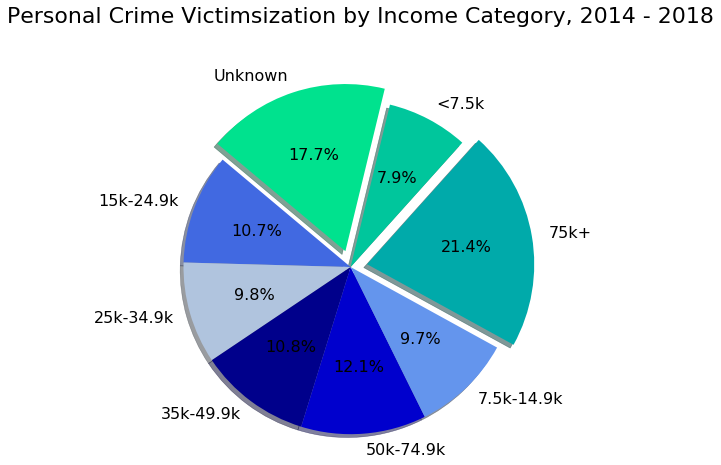

In [14]:
# Personal crime pie chart:
colors=['royalblue','lightsteelblue','darkblue','mediumblue','cornflowerblue','#00AAAA','#00C69C','#00E28E']
explode=(0,0,0,0,0,0.1,0,0.1)
plt.rcParams['figure.figsize']=(7,7)

plt.pie(pct_of_pvictims['gender'], labels=pct_of_pvictims['income'], colors=colors, shadow=True,  explode=explode,
        startangle=140, autopct="%1.1f%%")

plt.title('Personal Crime Victimsization by Income Category, 2014 - 2018', fontsize=22, pad=45)
#plt.rcParams['font.size']=(16)
plt.rc('font',size=16)
plt.legend('',frameon=False)
plt.axis('equal')

plt.show()

---
###### Household Crime Victimization by Income Category For All Four Regions, 2014 - 2018

In [15]:
# Create GroupBy object based on "income":
grouped_hincome_df=ncvs_h.groupby(['income'])

# Total number of victims in each income group:
total_hvictims_by_grup=grouped_hincome_df['gender'].count()
#total_hvictims_by_grup

# Total number of victims:
total_hvictims=ncvs_h['income'].count()
#total_hvictims

# Calculate percentage of victims in each income group:
pct_of_hvictims=(total_hvictims_by_grup/total_hvictims)*100
#pct_of_hvictims

# Change index:
pct_of_hvictims=pct_of_hvictims.reset_index()
pct_of_hvictims

# Sort by income groups:
pct_of_hvictims.loc[[6,4,0,1,2,3,5,7],:]

,income,gender
6,<7.5k,5.424775
4,7.5k-14.9k,7.933183
0,15k-24.9k,9.463035
1,25k-34.9k,9.611886
2,35k-49.9k,11.803297
3,50k-74.9k,12.790121
5,75k+,22.730029
7,Unknown,20.243674


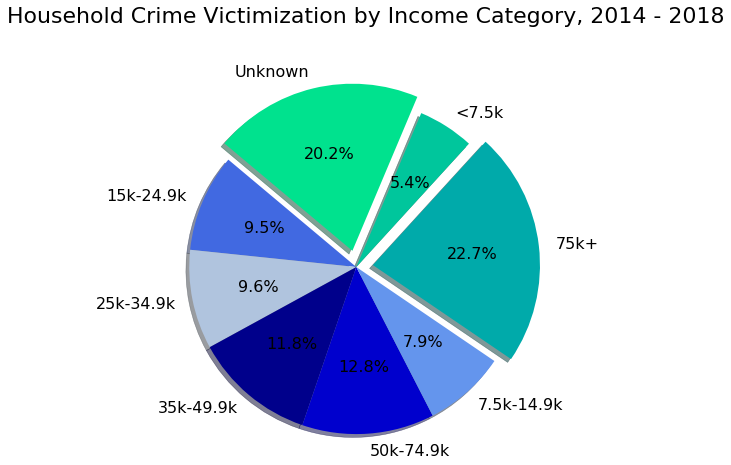

In [16]:
# Household crime pie chart:
colors=['royalblue','lightsteelblue','darkblue','mediumblue','cornflowerblue','#00AAAA','#00C69C','#00E28E']
explode=(0,0,0,0,0,0.1,0,0.1)
plt.rcParams['figure.figsize']=(7,7)

plt.pie(pct_of_hvictims['gender'], labels=pct_of_hvictims['income'], colors=colors, shadow=True,  explode=explode,
        startangle=140, autopct="%1.1f%%")

plt.title('Household Crime Victimization by Income Category, 2014 - 2018', fontsize=22, pad=45)
#plt.rcParams['font.size']=(16)
plt.rc('font',size=16)
plt.legend('',frameon=False)
plt.axis('equal')

plt.show()

---
## Analysis by Region
---

###### Personal Crime Victimization by Region, 2014 - 2018 

In [17]:
# Calculate total crime by region:
pcrime_by_region=ncvs['region'].value_counts()
pcrime_by_region

South        2907
West         2790
MidWest      2645
NorthEast    1108
Name: region, dtype: int64

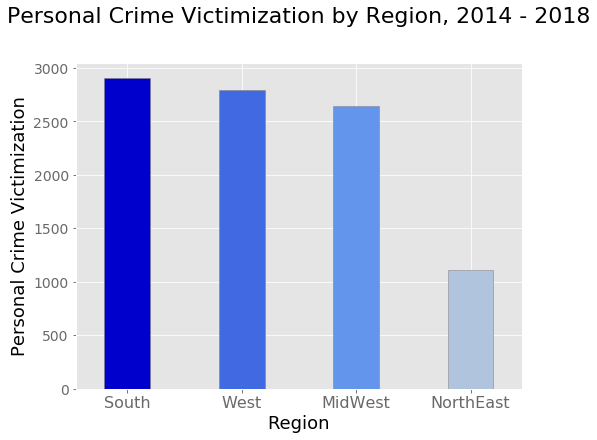

In [32]:
# Personal crime bar chart by region:
p_chart=pcrime_by_region.plot(kind='bar', figsize=(8, 6), color=['mediumblue','royalblue','cornflowerblue',
                                                                 'lightsteelblue'], alpha=1, edgecolor='gray',
                                                                  align="center", width=0.4)

# Set x-label, y-label, and title:
p_chart.set_title('Personal Crime Victimization by Region, 2014 - 2018',fontsize=22, pad=40)
p_chart.set_xlabel('Region',fontsize=18, color='black')
p_chart.set_ylabel('Personal Crime Victimization',fontsize=18, color='black')

# Set tick marks:
for tick in p_chart.get_xticklabels():
    tick.set_fontsize(16)
    tick.set_rotation(0)
    tick.set_color('dimgray')
for tick in p_chart.get_yticklabels():
    tick.set_fontsize(14)
    tick.set_color('dimgray')

# Set y limits:
plt.ylim(0, 3050)

plt.show()

---
###### Household Crime Victimization by Region, 2014 - 2018

In [33]:
# Calculate total crime by region:
hcrime_by_region=ncvs_h['region'].value_counts()
hcrime_by_region

South        11963
West         11220
Midwest       9347
Northeast     3748
Name: region, dtype: int64

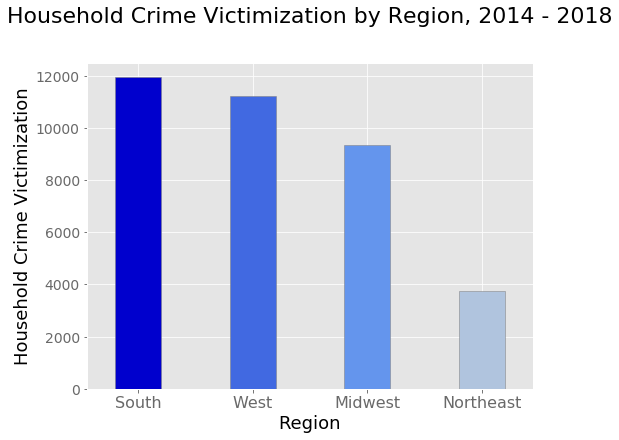

In [34]:
# Household crime bar chart by region:
h_chart=hcrime_by_region.plot(kind='bar', figsize=(8, 6), color=['mediumblue','royalblue','cornflowerblue',
                                                                 'lightsteelblue'], alpha=1, edgecolor='gray',
                                                                  align="center", width=0.4)

# Set x-label, y-label, and title:
h_chart.set_title('Household Crime Victimization by Region, 2014 - 2018',fontsize=22, pad=40)
h_chart.set_xlabel('Region',fontsize=18, color='black')
h_chart.set_ylabel('Household Crime Victimization',fontsize=18, color='black')

# Set tick marks:
for tick in h_chart.get_xticklabels():
    tick.set_fontsize(16)
    tick.set_rotation(0)
    tick.set_color('dimgray')
for tick in h_chart.get_yticklabels():
    tick.set_fontsize(14)
    tick.set_color('dimgray')

# Set y limits:
plt.ylim(0, 12500)

plt.show()

---
###### Personal Crime Victimization Change by Region, 2014 - 2018

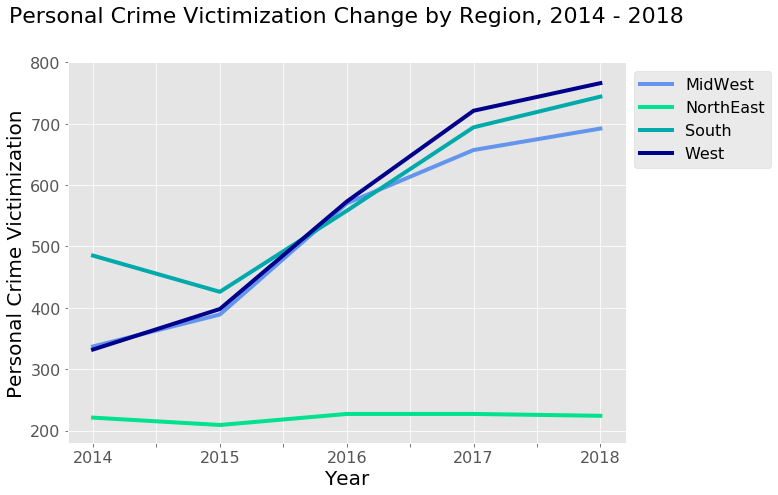

In [35]:
# Set a line chart:
fig, ax = plt.subplots(figsize=(10,7))
colors=['cornflowerblue','#00E28E','#00AAAA','darkblue']

# Use unstack() and plot:
pyear_grouped_df=ncvs.groupby(['year','region']).count()['file report'].unstack().plot(ax=ax, linewidth=4,
                                                                                       color=colors)

# Set x-label, y-label, and title:
plt.title('Personal Crime Victimization Change by Region, 2014 - 2018', fontsize=22, pad=40)
plt.xlabel('Year', fontsize=20, color='black')
plt.ylabel('Personal Crime Victimization', fontsize=20, color='black')
plt.ylim(180,800)

# Adjust legends:
current_handles, current_labels = plt.gca().get_legend_handles_labels()

reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

plt.legend(reversed_handles,reversed_labels)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.85))

# Set the font size for axis tick labels:
for tick in ax.get_xticklabels():
    tick.set_fontsize(16)
for tick in ax.get_yticklabels():
    tick.set_fontsize(16)

plt.show()

---
###### Household Crime Victimization Change by Region, 2014 - 2018

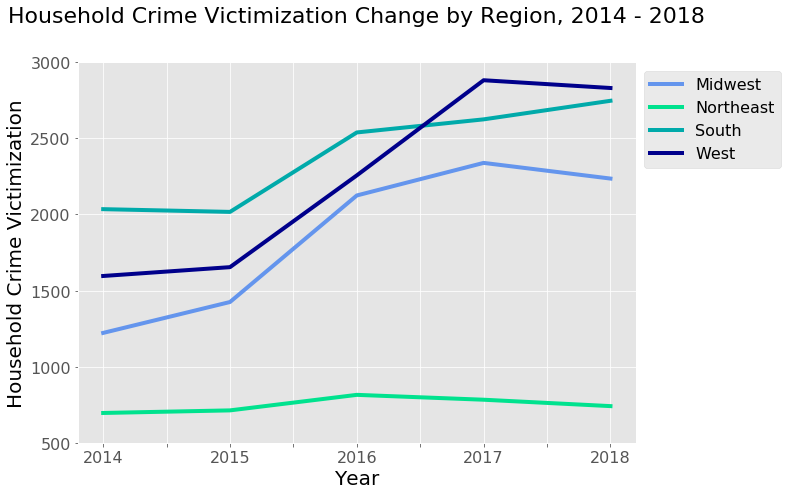

In [36]:
# Set a line chart:
fig, ax = plt.subplots(figsize=(10,7))
colors=['cornflowerblue','#00E28E','#00AAAA','darkblue']

# Use unstack() and plot:
hyear_grouped_df=ncvs_h.groupby(['year','region']).count()['file report'].unstack().plot(ax=ax, linewidth=4,
                                                                                       color=colors)

# Set x-label, y-label, and title:
plt.title('Household Crime Victimization Change by Region, 2014 - 2018', fontsize=22, pad=40)
plt.xlabel('Year', fontsize=20, color='black')
plt.ylabel('Household Crime Victimization', fontsize=20, color='black')
plt.ylim(500,3000)

# Adjust legends:
current_handles, current_labels = plt.gca().get_legend_handles_labels()

reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

plt.legend(reversed_handles,reversed_labels)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.85))

# Set the font size for axis tick labels:
for tick in ax.get_xticklabels():
    tick.set_fontsize(16)
for tick in ax.get_yticklabels():
    tick.set_fontsize(16)

plt.show()

---
## Analysis by Age Category
---

###### Average Personal Crime Victimization by Age Category, 2014 - 2018

In [37]:
# Extruct columns of interest from original data frame:
ncvs_2=ncvs[['region','year','age']]
#ncvs_2

# Create a pivot table and calculate victims average for each age category for period between 2014-2018:
pvictim_avg_by_age=ncvs_2.groupby(['year','age']).count()['region'].unstack()
pvictim_avg_by_age

# New data frame for avg victim amaunt by age group between 2014-2018:
avg_pvictim_vs_age_df=pvictim_avg_by_age.mean().reset_index()
avg_pvictim_vs_age_df

# Rename column:
avg_pvictim_vs_age_df=avg_pvictim_vs_age_df.rename(columns={0:'Avg Victim Count'})
avg_pvictim_vs_age_df=round(avg_pvictim_vs_age_df,0)
avg_pvictim_vs_age_df

,age,Avg Victim Count
0,12-14,112.0
1,15-17,73.0
2,18-20,117.0
3,21-24,171.0
4,25-34,399.0
5,35-49,490.0
6,50-64,396.0
7,65+,132.0


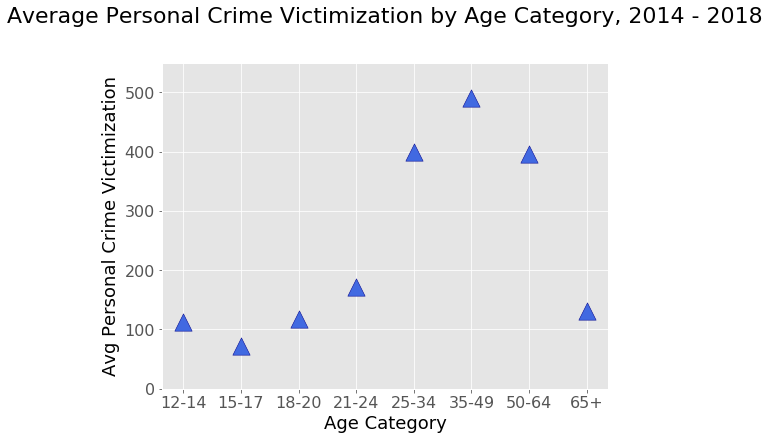

In [38]:
# Generate a scatter plot of age category vs average victim count between 2014-2018:
plt.figure(figsize=(8,6))
plt.ylim(0,550)

plt.scatter(avg_pvictim_vs_age_df.iloc[:,0], avg_pvictim_vs_age_df.iloc[:,1], 
            s=[300], color='royalblue', edgecolors='darkblue',  marker='^')

plt.xlabel('Age Category', fontsize=18, color='black')
plt.ylabel('Avg Personal Crime Victimization', fontsize=18, color='black')
plt.title('Average Personal Crime Victimization by Age Category, 2014 - 2018', fontsize=22, pad=40)

# Set the font size for axis tick labels:
for tick in ax.get_xticklabels():
    tick.set_fontsize(10)
for tick in ax.get_yticklabels():
    tick.set_fontsize(10)

degrees = 0
plt.xticks(rotation=degrees)    

plt.show()

---
###### Average Household Crime Victimization by Age Category, 2014 - 2018

In [39]:
# Extruct columns of interest from original data frame:
ncvs_h2=ncvs_h[['region','year','age']]
#ncvs_h2

# Create a pivot table and calculate victims average for each age category for period between 2014-2018:
hvictim_avg_by_age=ncvs_h2.groupby(['year','age']).count()['region'].unstack()
hvictim_avg_by_age

# New data frame for avg victim amaunt by age group between 2014-2018:
avg_hvictim_vs_age_df=hvictim_avg_by_age.mean().reset_index()
avg_hvictim_vs_age_df

# Rename column:
avg_hvictim_vs_age_df=avg_hvictim_vs_age_df.rename(columns={0:'Avg Victim Count'})
avg_hvictim_vs_age_df

# Sort by age groups:
avg_hvictim_vs_age_df=round(avg_hvictim_vs_age_df.loc[[4,0,1,2,3],:],0)
avg_hvictim_vs_age_df

,age,Avg Victim Count
4,<19,137.0
0,20-34,1879.0
1,35-49,2158.0
2,50-64,1984.0
3,65+,1098.0


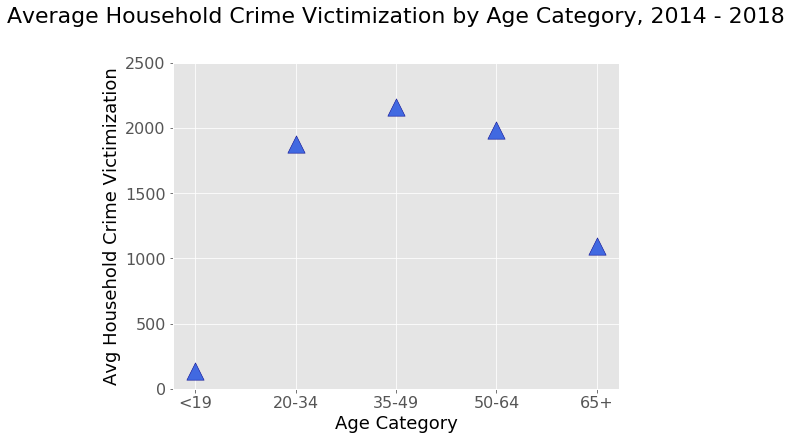

In [40]:
# Generate a scatter plot of age category vs average victim count between 2014-2018:
plt.figure(figsize=(8,6))
plt.ylim(0,2500)

plt.scatter(avg_hvictim_vs_age_df.iloc[:,0], avg_hvictim_vs_age_df.iloc[:,1], 
            s=[300], color='royalblue', edgecolors='darkblue',  marker='^')

plt.xlabel('Age Category', fontsize=18, color='black')
plt.ylabel('Avg Household Crime Victimization', fontsize=18, color='black')
plt.title('Average Household Crime Victimization by Age Category, 2014 - 2018', fontsize=22, pad=40)

# Set the font size for axis tick labels:
for tick in ax.get_xticklabels():
    tick.set_fontsize(10)
for tick in ax.get_yticklabels():
    tick.set_fontsize(10)

degrees = 0
plt.xticks(rotation=degrees)    

plt.show()